## Linear Discriminant Analysis (LDA)

We test this on the alcohol dataset.
The alcohol dataset represents 2 kind of whiskeys (type 1 and 2) with *p* attributes.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Linear Discriminant Analysis (LDA) is also used as dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible. For instance, suppose that we plotted the relationship between two variables where each color represent a different class.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [ ]:
data = pd.read_excel(r'C:\Users\Gebruiker\Desktop\Desktop_Ghent\Notebooks\datasets\alcohol.xlsx', sheet_name='training', header=0, index_col=0)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
sns.kdeplot(data=data, x="Propanol", hue="Class", multiple="stack");

In [ ]:
X = data.iloc[:,1:13]
X.head()

In [ ]:
# Autoscaling
from sklearn.preprocessing import scale
X = scale(X.values)
X

In [ ]:
y = data.Class
y

In [ ]:
lda = LDA(n_components=1) # N-1 where N are the classes
scores_lda = lda.fit(X, y).transform(X)

In [ ]:
print(lda.priors_)

The LDA output indicates prior probabilities of  π^1=0.5945  and  π^2=0.405 ; in other words, 59.4% of the training observations correspond to type 1 whiskey.

In [ ]:
print(lda.means_)

The above provides the **group means**; these are the average of each predictor **within each class**

In [ ]:
print(lda.coef_)

The coefficients of linear discriminants N-1 components output provides the linear combination of the variables that are used to form the LDA decision rule.

If  -12.41873985 * Acetaldehyde + 0.36481077 * Ethyl_acetate + ...  is large, then the LDA classifier will predict type 1 whiskey, and if it is small, then the LDA classifier will predict a type 2 whiskey.

The predict() function returns a list of LDA’s predictions about the training data:

In [ ]:
# We are going to see this results on the calibration data
pred=lda.predict(X)
print(np.unique(pred, return_counts=True))

The model assigned 24 observations to the "Type 1" class, and 16 observations to the "Type 2" class. Let's check out the confusion matrix to see how this model is doing.

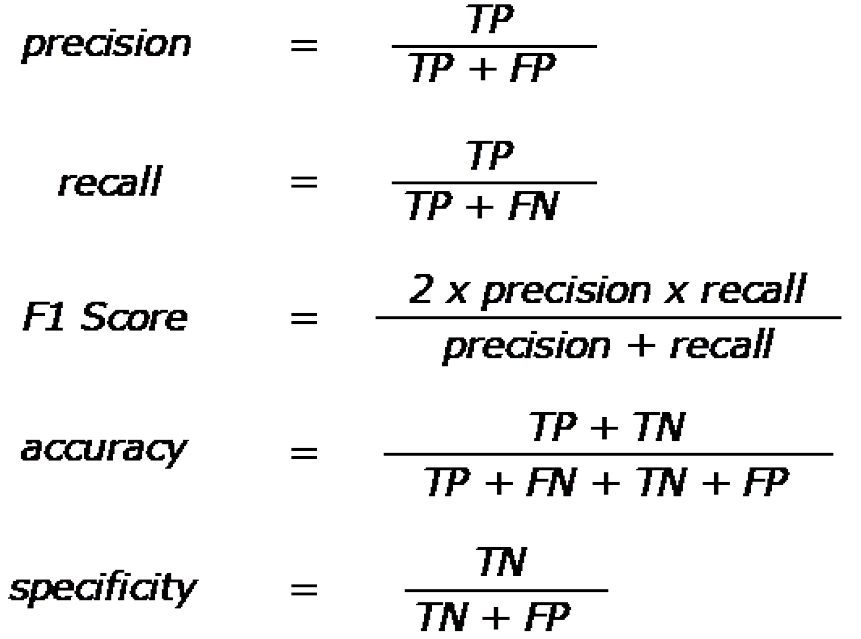

In [ ]:
print(confusion_matrix(pred, y))

In [ ]:
print(classification_report(y, pred, digits=3))

In [ ]:
scores = pd.DataFrame(data = scores_lda, columns = ['LV1']) # latent variables
scores.index = data.index
scores

In [ ]:
scores = pd.concat([scores, y], axis = 1)
print(scores)

In [ ]:
print('explained variance ratio (first two components) with LDA: %s'
  % str(lda.explained_variance_ratio_))

In [ ]:
lda.explained_variance_ratio_

In [ ]:
loadings = pd.DataFrame(lda.coef_.T[:,0],columns = ["LV1"])
loadings["Attributes"] = data.iloc[:,0:12].columns
loadings

In [ ]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x=scores.index, y="LV1", color="Class", hover_data=['Class'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [ ]:
# Loadings plot
fig = px.scatter(loadings, x=loadings.index, y="LV1",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

In [ ]:
sns.kdeplot(data=data, x="Ethyl_caprilate", hue="Class", multiple="stack");

### Confusion matrix, metrics and ROC curve - on test set

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
lda = LDA()
lda.fit(X_train, y_train)

In [ ]:
lda.predict(X_test)

In [ ]:
y_pred = lda.predict(X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

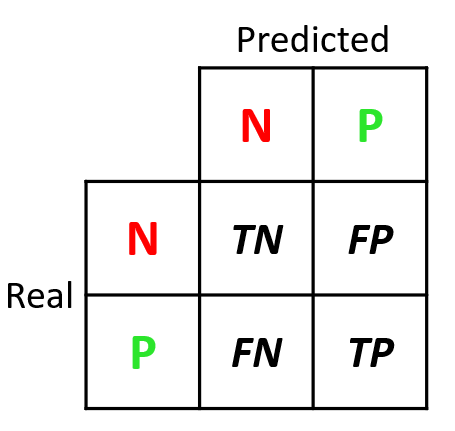

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [ ]:
print(tn,fp,fn,tp)

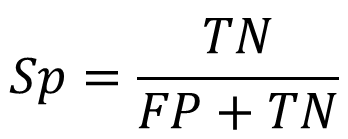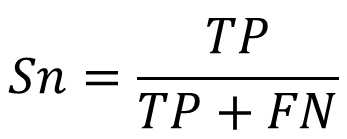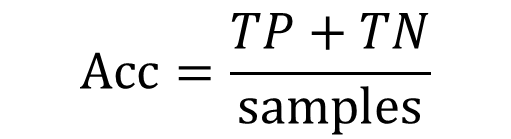

In [ ]:
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
accuracy = (tp+tn)/len(y_true)

In [ ]:
print(specificity,sensitivity,accuracy)

In [ ]:
plot_confusion_matrix(lda, X_test, y_test)  
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

lda = LDA()
lda.fit(X_train, y_train)

lda_disp = plot_roc_curve(lda, X_test, y_test)
lda_disp.figure_.suptitle("ROC curve comparison")

plt.show();


In [ ]:
test = pd.read_excel(r'C:\Users\Gebruiker\Desktop\Desktop_Ghent\Notebooks\datasets\alcohol.xlsx', sheet_name='test', header=0, index_col=0)

In [ ]:
test

In [ ]:
Xtest = test.iloc[:,1:13]
Xtest.head()

In [ ]:
# Autoscaling
from sklearn.preprocessing import scale
Xtest = scale(Xtest.values)
Xtest

In [ ]:
pred=lda.predict(Xtest)

In [ ]:
pred

## Quadratic Discriminant Analysis (QDA)

In [ ]:
qda = QDA()
qda = qda.fit(X_train, y_train)
print(qda.priors_)

In [ ]:
print(qda.means_)

The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [ ]:
qda.predict(X_test)

In [ ]:
pred_qda=qda.predict(X_test)
print(np.unique(pred_qda, return_counts=True))

In [ ]:
print(confusion_matrix(pred_qda, y_test))

In [ ]:
print(classification_report(y_test, pred_qda, digits=3))

## Partial Least Squares (PLS) - Discriminant Analysis (DA)

In [ ]:
from sklearn.cross_decomposition import PLSRegression as PLSR

In [ ]:
regr_pls = PLSR(n_components=3)
PLS_mod=regr_pls.fit_transform(X,y)
print(regr_pls.x_scores_)

In [ ]:
y = y.astype('category')
y

In [ ]:
y = y.cat.codes
y

In [ ]:
regr_pls = PLSR(n_components=3)
PLS_mod=regr_pls.fit_transform(X,y)
print(regr_pls.x_scores_)

In [ ]:
scores = regr_pls.x_scores_
scores

In [ ]:
scores = pd.DataFrame(scores, columns = ['LV1','LV2','LV3'])
scores.index = data.index
scores = pd.concat([scores, data.Class], axis = 1)
scores

In [ ]:
loadings = pd.DataFrame(regr_pls.x_loadings_,columns = ["LV1",'LV2','LV3'])
loadings["Attributes"] = data.iloc[:,1:13].columns
loadings

In [ ]:
import plotly.express as px
fig = px.scatter(scores, x="LV1", y="LV2", color="Class", hover_data=['Class'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [ ]:
# Loadings plot
fig = px.scatter(loadings, x="LV1", y="LV2",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

In [ ]:
sns.kdeplot(data=data, x="Ethyl_caprilate", hue="Class", multiple="stack");